# Práctica II

## Obtención de los datos

### Funciones de utilidad

Importación de las librerías necesarias

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import bartlett
from scipy.stats import pearsonr
from scipy.stats import levene
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
def root_path( directory, file_name ):
    return '/home/jovyan/work/%s/%s.csv' % (directory, file_name )
    

Función **`export_dataframe`** que permite exportar el dataframe a fichero CSV

In [3]:
def export_dataframe( df, file_name, directory ):
    file = root_path( directory, file_name )
    df.to_csv(file )    
    

In [4]:
def read_dataframe( file_name, directory ):
    file = root_path( directory, file_name )
    return pd.read_csv(file )
    

In [5]:
def read_subdataframe( file_name ):
    return read_dataframe( 
        file_name = file_name,
        directory = 'subdataset' 
    ).iloc[ : , 1:]

### _DATASET I_: Precio de Gas doméstico en € por kw/h

Obtención de los datos del subdataset de los precios del gas doméstico: `data_gas_prices_household_consumers.csv`

Importación del subdataframe

In [6]:
data_gas_prices_household_consumers = read_subdataframe(
    file_name = 'data_gas_prices_household_consumers'
)

Columnas del dataset:

In [7]:
display( data_gas_prices_household_consumers.dtypes )

country          object
country_name     object
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

Se muestran los 10 primeros valores:

In [8]:
data_gas_prices_household_consumers.head( 10 )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,0.0299,0.0304,0.0312,0.0308,0.0316
1,BA,Bosnia and Herzegovina,0.0240,0.0240,0.0249,0.0258,0.0251
2,BE,Belgium,0.0283,0.0288,0.0289,0.0252,0.0315
3,BG,Bulgaria,0.0170,0.0209,0.0240,0.0177,0.0331
4,CZ,Czechia,0.0360,0.0390,0.0455,0.0431,0.0448
5,DE,Germany (until 1990 former territory of the FRG),NaN,NaN,0.0278,0.0292,0.0293
6,DK,Denmark,0.0234,0.0259,0.0209,0.0160,0.0415
7,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0295,0.0303,0.0319,0.0302,0.0315
8,EE,Estonia,0.0234,0.0239,0.0253,0.0240,0.0361
9,EL,Greece,NaN,0.0311,0.0338,0.0258,0.0444


### _DATASET II_: Precio de Gas no doméstico en € por kw/h

Obtención de los datos del subdataset de los precios del gas no doméstico: `data_gas_prices_no_household_consumers.csv`

Importación del subdataframe

In [9]:
data_gas_prices_no_household_consumers = read_subdataframe(
    file_name = 'data_gas_prices_no_household_consumers'
)

Columnas del dataset:

In [10]:
display( data_gas_prices_no_household_consumers.dtypes )

country          object
country_name     object
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

Se muestran los 10 primeros valores:

In [11]:
data_gas_prices_no_household_consumers.head( 10 )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,NaN,NaN,0.0184,0.0168,0.0297
1,BA,Bosnia and Herzegovina,NaN,NaN,0.0257,0.0259,0.0248
2,BE,Belgium,NaN,NaN,0.0189,0.0148,0.0318
3,BG,Bulgaria,NaN,NaN,0.0213,0.0142,0.0299
4,CZ,Czechia,NaN,NaN,0.0226,0.0192,0.0259
5,DE,Germany (until 1990 former territory of the FRG),NaN,NaN,0.0196,0.0171,0.0262
6,DK,Denmark,0.0194,0.0234,0.0178,0.0137,0.0448
7,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0220,0.0240,0.0211,0.0175,0.0278
8,EE,Estonia,NaN,NaN,0.0213,0.0155,0.0352
9,EL,Greece,NaN,NaN,0.0260,0.0165,0.0337


### _DATASET III_: Precio de la electricidad doméstica para la franja de 2.500 a 4.999 kWh

Obtención de los datos del subdataset del precio de la electricidad doméstica para la franja de 2.500 a 4.999 kWh `data_electricity_prices_household_consumers.csv`


Importación del subdataframe

In [12]:
data_electricity_prices_household_consumers = read_subdataframe(
    file_name = 'data_electricity_prices_household_consumers'
)

Columnas del dataset:

In [13]:
display( data_electricity_prices_household_consumers.dtypes )

country          object
country_name     object
2012-S2         float64
2013-S2         float64
2014-S2         float64
2015-S2         float64
2016-S2         float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

Se muestran los 10 primeros valores:

In [14]:
data_electricity_prices_household_consumers.head(10)

,country,country_name,2012-S2,2013-S2,2014-S2,2015-S2,2016-S2,2017,2018,2019,2020,2021
0,AL,Albania,NaN,NaN,NaN,NaN,NaN,0.0713,0.0759,0.0778,NaN,0.0781
1,AT,Austria,NaN,NaN,NaN,NaN,NaN,0.0613,0.0623,0.0687,0.0732,0.0745
2,BA,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,0.0342,0.0338,0.0361,0.0365,NaN
3,BE,Belgium,NaN,NaN,NaN,NaN,NaN,0.0735,0.0808,0.0859,0.0786,0.0844
4,BG,Bulgaria,NaN,NaN,NaN,NaN,NaN,0.0575,0.0585,0.0558,0.0560,0.0608
5,CY,Cyprus,NaN,NaN,NaN,NaN,NaN,0.1036,0.1157,0.1241,0.1042,0.1094
6,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,0.0541,0.0570,0.0690,0.0749,0.0979
7,DE,Germany (until 1990 former territory of the FRG),NaN,NaN,NaN,NaN,NaN,0.0686,0.0622,0.0581,0.0574,0.0803
8,DK,Denmark,NaN,NaN,NaN,NaN,NaN,0.0388,0.0503,0.0539,0.0409,0.0747
9,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",NaN,NaN,NaN,NaN,NaN,0.0760,0.0801,0.0727,0.0697,0.0898


### _DATASET IV_: Precio de la electricidad no doméstica

OObtención de los datos del subdataset del precio de la electricidad no doméstica `data_electricity_prices_no_household_consumers.csv`

Importación del subdataframe

In [15]:
data_electricity_prices_no_household_consumers = read_subdataframe(
    file_name = 'data_electricity_prices_no_household_consumers'
)

Columnas del dataset:

In [16]:
display( data_electricity_prices_no_household_consumers.dtypes )

country          object
country_name     object
2007-S2         float64
2008-S2         float64
2009-S2         float64
2010-S2         float64
2011-S2         float64
2012-S2         float64
2013-S2         float64
2014-S2         float64
2015-S2         float64
2016-S2         float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

Se muestran los 10 primeros valores:

In [17]:
data_electricity_prices_no_household_consumers.head( 10 )

,country,country_name,2007-S2,2008-S2,2009-S2,2010-S2,2011-S2,2012-S2,2013-S2,2014-S2,2015-S2,2016-S2,2017,2018,2019,2020,2021
0,AT,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0598,0.0610,0.0654,0.0702,0.0723
1,BA,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0649,0.0621,0.0624,0.0648,NaN
2,BE,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0672,0.0624,0.0663,0.0745,0.0890
3,BG,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0817,0.0810,0.0764,0.0730,0.1075
4,CY,Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1187,0.1240,0.1271,0.1055,0.1136
5,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0580,0.0602,0.0721,0.0811,0.0848
6,DE,Germany (until 1990 former territory of the FRG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0468,0.0612,0.0525,0.0651,0.0707
7,DK,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0433,0.0514,0.0517,0.0426,0.0898
8,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0757,0.0837,0.0794,0.0780,0.0893
9,EE,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0406,0.0489,0.0516,0.0440,0.0850


## Análisis inicial y procesamiento de los datos

### Funciones de utilidad

Estimador utilizando la media **`median_estimator`**. Dentro de una columna del dataframe evalúa aquellos valores nulos y lo sustituye por la media de los valores que no lo son

In [18]:
def median_estimator( df, column ) :    
    median = df.loc[pd.notnull( df[column]), column].median()
    df[column].fillna(median,inplace=True)    
    return df    


Función **`show_boxplot`** que muestra el diagrama de caja de los valores de un dataframe


In [19]:
def show_boxplot( df ):
    sns.set_theme( style = "whitegrid" )
    ax = sns.boxplot( data = df )
    

Función **`init_outlier`**. Iializa el Outlier de una columna, inicializa a nulo el valor máximo de la columna

In [20]:
def init_outlier(df, column): 
    df.loc[
        df[column] == df[column].max(),
        column 
    ] = np.nan
    return df


### Datos de los costes del gas doméstico


Sustituimos NaN values por su media

In [21]:
GasPricesHousehold=data_gas_prices_household_consumers

GasPricesHousehold = median_estimator( GasPricesHousehold, '2021' )
GasPricesHousehold = median_estimator( GasPricesHousehold, '2020' )
GasPricesHousehold = median_estimator( GasPricesHousehold, '2019' )
GasPricesHousehold = median_estimator( GasPricesHousehold, '2018' )
GasPricesHousehold = median_estimator( GasPricesHousehold, '2017' )


Se muestran los 10 primeros valores:

In [22]:
display( GasPricesHousehold.head(10) )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,0.0299,0.0304,0.0312,0.0308,0.0316
1,BA,Bosnia and Herzegovina,0.0240,0.0240,0.0249,0.0258,0.0251
2,BE,Belgium,0.0283,0.0288,0.0289,0.0252,0.0315
3,BG,Bulgaria,0.0170,0.0209,0.0240,0.0177,0.0331
4,CZ,Czechia,0.0360,0.0390,0.0455,0.0431,0.0448
5,DE,Germany (until 1990 former territory of the FRG),0.0243,0.0254,0.0278,0.0292,0.0293
6,DK,Denmark,0.0234,0.0259,0.0209,0.0160,0.0415
7,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0295,0.0303,0.0319,0.0302,0.0315
8,EE,Estonia,0.0234,0.0239,0.0253,0.0240,0.0361
9,EL,Greece,0.0243,0.0311,0.0338,0.0258,0.0444


Diagrama de caja para los diferentes años:

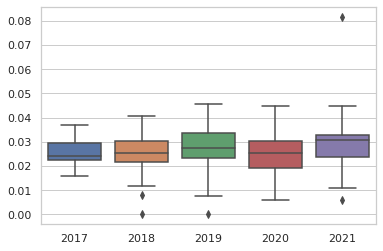

In [23]:
show_boxplot( GasPricesHousehold )

### Datos de los costes del gas para empresas


Sustituimos NaN values por su media

In [24]:
GasPricesNoHousehold = data_gas_prices_no_household_consumers

GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2021' )
GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2020' )
GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2019' )
GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2018' )
GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2017' )

Se muestran los 10 primero valores:

In [25]:
display( GasPricesNoHousehold.head(10) )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,0.0220,0.0240,0.0184,0.0168,0.0297
1,BA,Bosnia and Herzegovina,0.0220,0.0240,0.0257,0.0259,0.0248
2,BE,Belgium,0.0220,0.0240,0.0189,0.0148,0.0318
3,BG,Bulgaria,0.0220,0.0240,0.0213,0.0142,0.0299
4,CZ,Czechia,0.0220,0.0240,0.0226,0.0192,0.0259
5,DE,Germany (until 1990 former territory of the FRG),0.0220,0.0240,0.0196,0.0171,0.0262
6,DK,Denmark,0.0194,0.0234,0.0178,0.0137,0.0448
7,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0220,0.0240,0.0211,0.0175,0.0278
8,EE,Estonia,0.0220,0.0240,0.0213,0.0155,0.0352
9,EL,Greece,0.0220,0.0240,0.0260,0.0165,0.0337


Diagrama de caja para los diferentes años:

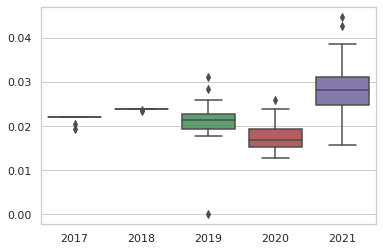

In [26]:
show_boxplot( GasPricesNoHousehold )

### Datos de los costes de la electricidad doméstica


Se eliminan las columnas correspondientes a los valores semestrales de lo años desde el 2012 al 2016 que no contienen datos

In [27]:
ElectPricesHouseholds = data_electricity_prices_household_consumers.drop(
    [
     '2012-S2',
     '2013-S2',
     '2014-S2',
     '2015-S2',
     '2016-S2'
    ], axis=1
)

Muestra de los 10 primeros valores

In [28]:
display( ElectPricesHouseholds.head( 10 ) )

,country,country_name,2017,2018,2019,2020,2021
0,AL,Albania,0.0713,0.0759,0.0778,NaN,0.0781
1,AT,Austria,0.0613,0.0623,0.0687,0.0732,0.0745
2,BA,Bosnia and Herzegovina,0.0342,0.0338,0.0361,0.0365,NaN
3,BE,Belgium,0.0735,0.0808,0.0859,0.0786,0.0844
4,BG,Bulgaria,0.0575,0.0585,0.0558,0.0560,0.0608
5,CY,Cyprus,0.1036,0.1157,0.1241,0.1042,0.1094
6,CZ,Czechia,0.0541,0.0570,0.0690,0.0749,0.0979
7,DE,Germany (until 1990 former territory of the FRG),0.0686,0.0622,0.0581,0.0574,0.0803
8,DK,Denmark,0.0388,0.0503,0.0539,0.0409,0.0747
9,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0760,0.0801,0.0727,0.0697,0.0898


Se muestra el diagrama de caja

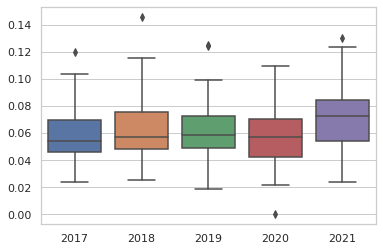

In [29]:
show_boxplot( ElectPricesHouseholds )

Detectamos Outlier en el año 2021, inicializamos valor

In [30]:
ElectPricesHouseholds = init_outlier(ElectPricesHouseholds, '2021')

 Estimamos valores nulos por la media

In [31]:
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2021' )
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2020' )
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2019' )
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2018' )
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2017' )


Se vuelve a mostrar el diagrama de caja

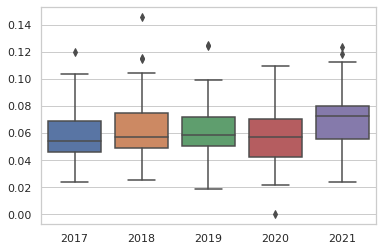

In [32]:
show_boxplot( ElectPricesHouseholds )

### Datos de los costes de la electricidad para empresas


Se eliminan las columnas correspondientes a los valores semestrales de lo años desde el 2012 al 2016 que no contienen datos

In [33]:
ElectPricesNoHouseholds = data_electricity_prices_no_household_consumers.drop(
    [
        '2007-S2',
        '2008-S2',
        '2009-S2',
        '2010-S2',
        '2011-S2',
        '2012-S2',
        '2013-S2',
        '2014-S2',
        '2015-S2',
        '2016-S2'
    ], axis=1
)

Se muestra el diagrama de caja

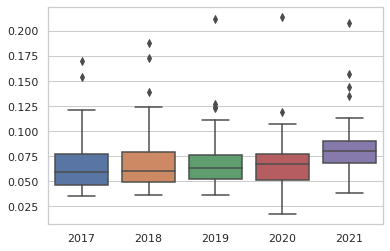

In [34]:
show_boxplot( ElectPricesNoHouseholds )

Muestra de los 10 primeros valores

In [35]:
display( ElectPricesNoHouseholds.head( 10 ) )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,0.0598,0.0610,0.0654,0.0702,0.0723
1,BA,Bosnia and Herzegovina,0.0649,0.0621,0.0624,0.0648,NaN
2,BE,Belgium,0.0672,0.0624,0.0663,0.0745,0.0890
3,BG,Bulgaria,0.0817,0.0810,0.0764,0.0730,0.1075
4,CY,Cyprus,0.1187,0.1240,0.1271,0.1055,0.1136
5,CZ,Czechia,0.0580,0.0602,0.0721,0.0811,0.0848
6,DE,Germany (until 1990 former territory of the FRG),0.0468,0.0612,0.0525,0.0651,0.0707
7,DK,Denmark,0.0433,0.0514,0.0517,0.0426,0.0898
8,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0757,0.0837,0.0794,0.0780,0.0893
9,EE,Estonia,0.0406,0.0489,0.0516,0.0440,0.0850


Detectamos Outlier en los valores del 2021 y lo inicializamos 

In [36]:
ElectPricesHouseholds = init_outlier(ElectPricesNoHouseholds, '2021')

Se evaluan con el estimador de la media los valores nulos

In [37]:
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2021' )
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2020' )
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2019' )
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2018' )
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2017' )


Se vuelve a mostrar el diagrama de caja

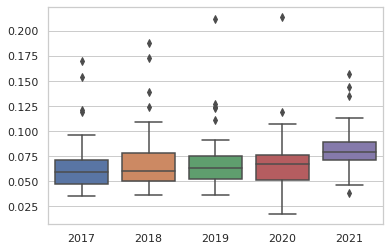

In [38]:
show_boxplot( ElectPricesNoHouseholds )

### _Conclusión de análisis inicial de datos:_

Descartamos continuar el análisis del "Gas" en el caso de los precios de los consumos de las empresas, ya que los datos obtenidos son una muestra demasiado pequeña, en concreto en los años 2017 y 2018 (ver dataset [data_gas_prices_no_household_consumers.csv](subdataset/data_gas_prices_no_household_consumers.csv)).

data_electricity_prices_household_consumers# Generación del dataset Final de trabajo

Generamos El Dataset final a exportar, con los datos posibles 

In [39]:
dElectCol = pd.merge(
    ElectPricesHouseholds, 
    ElectPricesNoHouseholds.drop(['country_name'], axis=1), 
    on='country',
    suffixes=('_ElectHouse', '_ElectNoHouse')
)

dGasCol = pd.merge(
    GasPricesHousehold.drop(['country_name'], axis=1), 
    GasPricesNoHousehold.drop(['country_name'], axis=1), 
    on='country',
    suffixes=('_GasHouse', '_GasNoHouse')
)

dEnergyCol = pd.merge(
    dElectCol, 
    dGasCol, 
    on='country'
)



Mostramos el dataset final a publicar:

In [40]:
dEnergyCol.head()

,country,country_name,2017_ElectHouse,2018_ElectHouse,2019_ElectHouse,2020_ElectHouse,2021_ElectHouse,2017_ElectNoHouse,2018_ElectNoHouse,2019_ElectNoHouse,...,2017_GasHouse,2018_GasHouse,2019_GasHouse,2020_GasHouse,2021_GasHouse,2017_GasNoHouse,2018_GasNoHouse,2019_GasNoHouse,2020_GasNoHouse,2021_GasNoHouse
0,AT,Austria,0.0598,0.0610,0.0654,0.0702,0.0723,0.0598,0.0610,0.0654,...,0.0299,0.0304,0.0312,0.0308,0.0316,0.022,0.024,0.0184,0.0168,0.0297
1,BA,Bosnia and Herzegovina,0.0649,0.0621,0.0624,0.0648,0.0793,0.0649,0.0621,0.0624,...,0.0240,0.0240,0.0249,0.0258,0.0251,0.022,0.024,0.0257,0.0259,0.0248
2,BE,Belgium,0.0672,0.0624,0.0663,0.0745,0.0890,0.0672,0.0624,0.0663,...,0.0283,0.0288,0.0289,0.0252,0.0315,0.022,0.024,0.0189,0.0148,0.0318
3,BG,Bulgaria,0.0817,0.0810,0.0764,0.0730,0.1075,0.0817,0.0810,0.0764,...,0.0170,0.0209,0.0240,0.0177,0.0331,0.022,0.024,0.0213,0.0142,0.0299
4,CZ,Czechia,0.0580,0.0602,0.0721,0.0811,0.0848,0.0580,0.0602,0.0721,...,0.0360,0.0390,0.0455,0.0431,0.0448,0.022,0.024,0.0226,0.0192,0.0259


Columnas del dataset a Publicar:

In [41]:
display( dEnergyCol.dtypes )

country               object
country_name          object
2017_ElectHouse      float64
2018_ElectHouse      float64
2019_ElectHouse      float64
2020_ElectHouse      float64
2021_ElectHouse      float64
2017_ElectNoHouse    float64
2018_ElectNoHouse    float64
2019_ElectNoHouse    float64
2020_ElectNoHouse    float64
2021_ElectNoHouse    float64
2017_GasHouse        float64
2018_GasHouse        float64
2019_GasHouse        float64
2020_GasHouse        float64
2021_GasHouse        float64
2017_GasNoHouse      float64
2018_GasNoHouse      float64
2019_GasNoHouse      float64
2020_GasNoHouse      float64
2021_GasNoHouse      float64
dtype: object

## Exportación dataset Final en formato CSV

In [42]:
export_dataframe( 
    df = dEnergyCol, 
    file_name = 'energy_price_dataset', 
    directory = 'dataset' 
) 

# Dataset a analizar a partir del dataset publicado

De las conclusiones del anterior estudio vemos que no hay suficientes datos en los datos relativos al precio del gas de las empresas para poder hacer un análisis. Decimos entonces continuar sólo con los datos que hacen referencia a los precios del gas y de la electricidad relativos a entornos domésticos.

Costruimos un dataset filtrando solo estos datos, eliminando los datos relativos al precio del gas y a la electricidad de las empresas en el dataset original y también se eliminan los datos acumulados relativos a la Unión Europea:

In [43]:
dEnergyHouseCol = dEnergyCol.loc[
                  : ,~dEnergyCol.columns.str.endswith('NoHouse')
                ].loc[
                  (dEnergyCol["country"] != "EU27_2020" )
                ].loc[
                  (dEnergyCol["country"] != "EA" )
                ]

Columnas del dataset a Analizar:

In [44]:
display( dEnergyHouseCol.dtypes )

country             object
country_name        object
2017_ElectHouse    float64
2018_ElectHouse    float64
2019_ElectHouse    float64
2020_ElectHouse    float64
2021_ElectHouse    float64
2017_GasHouse      float64
2018_GasHouse      float64
2019_GasHouse      float64
2020_GasHouse      float64
2021_GasHouse      float64
dtype: object

Se presenta una muestra del dataset filtrando sólamente los datos domésticos

In [45]:
display( dEnergyHouseCol.head() )

,country,country_name,2017_ElectHouse,2018_ElectHouse,2019_ElectHouse,2020_ElectHouse,2021_ElectHouse,2017_GasHouse,2018_GasHouse,2019_GasHouse,2020_GasHouse,2021_GasHouse
0,AT,Austria,0.0598,0.0610,0.0654,0.0702,0.0723,0.0299,0.0304,0.0312,0.0308,0.0316
1,BA,Bosnia and Herzegovina,0.0649,0.0621,0.0624,0.0648,0.0793,0.0240,0.0240,0.0249,0.0258,0.0251
2,BE,Belgium,0.0672,0.0624,0.0663,0.0745,0.0890,0.0283,0.0288,0.0289,0.0252,0.0315
3,BG,Bulgaria,0.0817,0.0810,0.0764,0.0730,0.1075,0.0170,0.0209,0.0240,0.0177,0.0331
4,CZ,Czechia,0.0580,0.0602,0.0721,0.0811,0.0848,0.0360,0.0390,0.0455,0.0431,0.0448


# Análisis de los datos

## Selección del grupo de datos

Teniendo por un lado un histórico de los precios de la electricidad y por otro los precios del gas por cada país. Se pretende hacer un estudio de la relación que existe entre ambos precios.

Para ello se procesa el dataset de los datos de precios de la energia doméstico para que cada registro tenga la información del país, del año y ambos precios

### Crear el dataset de trabajo

Primero se crea una función`reduce_dataset` que permite añadir los precios de la electricidad y del gas. Cada registro tendrá la información del país, del año que se pasa como argumento, al que se refieren los precios, y las columnas del precio del gas y la electricidad. 

In [46]:
def reduce_dataset( original_df, year ):
    # Nombre de las columnas de la electricidad y gas del año pasado por argumento
    column_name_electricity =  '%s_ElectHouse' % year
    column_name_gas =  '%s_GasHouse' % year 
    # Se obtiene las columnas relacionas con el país, el precio de la electricidad y el gas
    df =  original_df.loc[:,['country', column_name_electricity , column_name_gas]]
    # Se añade la columna del año
    df['Year'] = year    
    # Se renombran las columnas de electricidad y gas por precio de electricidad y gas respectivamente
    return df.rename(
        columns= { 
                    column_name_electricity: "ElectricityPrice", 
                    column_name_gas        : "GasPrice"  
                 }
    )

Se concatenan todos los años para crear el dataset de trabajo. También se resetea el índice del dataframe creado.

In [47]:
df_work = pd.concat(    
    [
        reduce_dataset( dEnergyHouseCol, 2017 ),
        reduce_dataset( dEnergyHouseCol, 2018 ),
        reduce_dataset( dEnergyHouseCol, 2019 ),
        reduce_dataset( dEnergyHouseCol, 2020 ),
        reduce_dataset( dEnergyHouseCol, 2021 )
    ]
)

df_work.reset_index(drop=True, inplace=True)

Se muestra los tipos de las columnas del dataset

In [48]:
display( df_work.dtypes )

country              object
ElectricityPrice    float64
GasPrice            float64
Year                  int64
dtype: object

Se muestra un ejemplo de los datos del dataset de trabajo que consta de 160 registros

In [49]:
display( df_work )

,country,ElectricityPrice,GasPrice,Year
0,AT,0.0598,0.0299,2017
1,BA,0.0649,0.0240,2017
2,BE,0.0672,0.0283,2017
3,BG,0.0817,0.0170,2017
4,CZ,0.0580,0.0360,2017
...,...,...,...,...
155,SI,0.0641,0.0264,2021
156,SK,0.0725,0.0195,2021
157,TR,0.0518,0.0110,2021
158,UA,0.0793,0.0306,2021


#### Diagrama de dispersión entre los precios de la electricidad y del gas 

Para comprobar la dependencia y la correlación entre los precios de la electricidad y el gas de manera gráfica, se muestra el diagrama  de dispersión

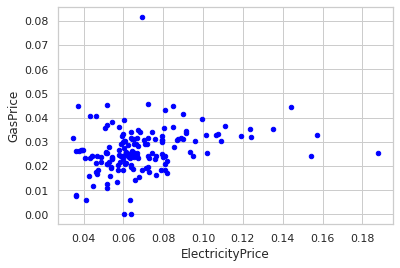

In [50]:
df_work.plot(kind='scatter', x = "ElectricityPrice", y ="GasPrice", color = "blue")

plt.show()

#### Valores de los precios de la electricidad

Se obtienen los valores del precio de la electricidad que se usarán en apartados posteriores:

In [51]:
electricityPriceValues = df_work.loc[:, "ElectricityPrice"].to_numpy() 

display( electricityPriceValues )

array([0.0598 , 0.0649 , 0.0672 , 0.0817 , 0.058  , 0.0468 , 0.0433 ,
       0.0406 , 0.081  , 0.1541 , 0.0641 , 0.05895, 0.0574 , 0.0536 ,
       0.0959 , 0.0949 , 0.0461 , 0.0581 , 0.0515 , 0.0675 , 0.0517 ,
       0.05895, 0.0629 , 0.0599 , 0.0468 , 0.0364 , 0.0348 , 0.044  ,
       0.0464 , 0.0533 , 0.05895, 0.0871 , 0.061  , 0.0621 , 0.0624 ,
       0.081  , 0.0602 , 0.0612 , 0.0514 , 0.0489 , 0.0876 , 0.1877 ,
       0.0636 , 0.0364 , 0.0613 , 0.0573 , 0.1091 , 0.1022 , 0.0488 ,
       0.058  , 0.054  , 0.0646 , 0.0505 , 0.0602 , 0.0609 , 0.0593 ,
       0.0539 , 0.0389 , 0.0434 , 0.051  , 0.0526 , 0.0446 , 0.0602 ,
       0.1015 , 0.0654 , 0.0624 , 0.0663 , 0.0764 , 0.0721 , 0.0525 ,
       0.0517 , 0.0516 , 0.0912 , 0.1242 , 0.0685 , 0.0363 , 0.0756 ,
       0.0695 , 0.1236 , 0.1112 , 0.0542 , 0.0615 , 0.0597 , 0.0609 ,
       0.0515 , 0.0636 , 0.0602 , 0.0674 , 0.0636 , 0.0395 , 0.0462 ,
       0.0577 , 0.0633 , 0.066  , 0.0636 , 0.0912 , 0.0702 , 0.0648 ,
       0.0745 , 0.07

#### Valores de los precios del gas

Se obtienen los valores del precio de la gas que se usarńa en apartados posteriores:

In [52]:
gasPriceValues = df_work.loc[:, "GasPrice"].to_numpy() 

display( gasPriceValues )

array([0.0299 , 0.024  , 0.0283 , 0.017  , 0.036  , 0.0243 , 0.0234 ,
       0.0234 , 0.0243 , 0.0243 , 0.031  , 0.0243 , 0.0206 , 0.019  ,
       0.0302 , 0.0243 , 0.0174 , 0.0216 , 0.0207 , 0.0234 , 0.0371 ,
       0.0293 , 0.0237 , 0.0333 , 0.0168 , 0.0264 , 0.0314 , 0.0243 ,
       0.0213 , 0.0159 , 0.0243 , 0.0308 , 0.0304 , 0.024  , 0.0288 ,
       0.0209 , 0.039  , 0.0254 , 0.0259 , 0.0239 , 0.0311 , 0.0254 ,
       0.0317 , 0.008  , 0.0212 , 0.0183 , 0.0304 , 0.0254 , 0.0216 ,
       0.0245 , 0.023  , 0.0186 , 0.0357 , 0.0305 , 0.0246 , 0.0326 ,
       0.0197 , 0.0266 , 0.0405 , 0.0255 , 0.0218 , 0.0118 , 0.     ,
       0.0329 , 0.0312 , 0.0249 , 0.0289 , 0.024  , 0.0455 , 0.0278 ,
       0.0209 , 0.0253 , 0.0338 , 0.0318 , 0.0342 , 0.0075 , 0.0229 ,
       0.0184 , 0.0351 , 0.0366 , 0.0238 , 0.0258 , 0.0227 , 0.021  ,
       0.0454 , 0.0339 , 0.0274 , 0.0347 , 0.0204 , 0.0267 , 0.0405 ,
       0.0267 , 0.0234 , 0.0142 , 0.     , 0.0346 , 0.0308 , 0.0258 ,
       0.0252 , 0.01

## Análisis de la normalidad y homogeneidad de la varianza

### Normalidad

#### Análisis gráfico

Se crean los gráficos cuartil-cuartil para ver cuanto se aproximan a la normalidad ambas distribuciones

##### **Precios de la electricidad**

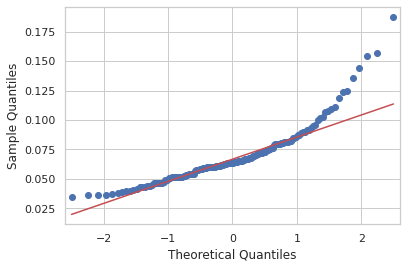

In [53]:
sm.qqplot( electricityPriceValues, line='q' )

plt.show()

Se puede ver que en los valores centrales si que se ajusta a una distribución normal pero no en el resto de la curva.

##### **Precios del gas**

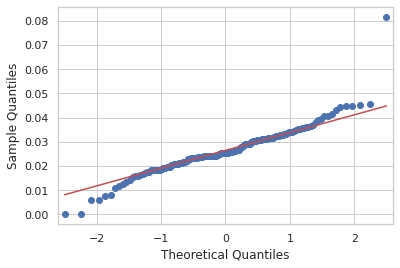

In [54]:
fig2 = sm.qqplot( gasPriceValues, line='q' )
plt.show()

Aunque menos acusado que el caso de los precios de la electricidad, también se puede ver que en los valores centrales si que se ajusta a una distribución normal pero no en el resto de la curva.

#### Test de Shapiro-Wilk

Los valores de los precios de la electricidad son valores continuos por lo que primeros se comprobará la normalidad de ambas muestras gracias al test de  Shapiro-Wilk.

El test de Shapiro-Will:

> **Hipótesis nula** `H_0`: _La muestra proviene de una población normalmente distribuida_.   
  **Hipótesis alternativa** `H_1`: _La muestra **no** proviene de una población normalmente distribuida_


##### **Precios de la electricidad**

In [55]:
stats.shapiro( electricityPriceValues )

ShapiroResult(statistic=0.8568865656852722, pvalue=3.429784928288271e-11)

Al ser el valor `p-value` menor que el nivel de significación `α = 0,05`, podemos **rechazar la hipétesis nula** y concluir que la distribución de los precios de la electricidad doméstica **no** sigue una distribución normal.

##### **Precios del gas**

In [56]:
stats.shapiro( gasPriceValues )

ShapiroResult(statistic=0.9196622967720032, pvalue=9.427189695543348e-08)

Igual que en el caso de la electricidad el p-value es menor que el nivel de significación 

    p-value = 9,427e-08 < α, α = 0,05
    
por lo que se puede deducir que los precios los precios del gas doméstico **no** siguen un distribución normal.

### Aplicación Teorema del límite central

Este teorema establece que el contraste de hipótesis sobre la media de una muestra se aproxima a una distribución normal aunque la población original no siga una distribución normal, siempre que el tamaño de la muestra n sea suficientemente grande. Por suficientemente grande, se suele contemplar superior a 30 elementos, `n > 30`.

Ya que el número de registros es 160 podemos aplicar el teorema del límite central y considerar que la distribución de valores, tanto de la electricidad como del gas doméstico que si **se aproximan a una distribución normal**, aunque por el test de Shapiro no cumplan la normalidad.

### Homogeniedad de la varianza

Ya que se ambas distribuciones se aproximan a una distribución normal, se utiliza el test de _Levene_ en el que:

> **Hipótesis nula**, `H_0`: _Las varianzas de las poblaciones son la mismas._   
   **Hipótesis alternativa** `H_1`: _Las varianzas de las poblaciones **no** son la mismas._

Un valor por debajo del valor significativo (`α = 0,05`) hace que se rechaze la hipótesis nula y se llege a la conclusión a la conclusión de que existe una diferencia en la varianza de las poblaciones

In [57]:
stats.levene( electricityPriceValues, gasPriceValues )

LeveneResult(statistic=36.758905069565806, pvalue=3.7856980926583945e-09)

A la vista de los resultados del test de Levene (`pvalue = 1,847e-10`), se rechaza la condición de homocedasticidad, llegando a la conclusión que **las varianzas** entre los precios de la electricidad y gas domesticos **no son las mismas**. Por lo tanto presenta **Heterocedasticidad**.

## Aplicación de pruebas estadísticas

### Contraste de hipótesis

Como contraste de hipótesis se va a comprobar que las distribuciones de los datos de los precios domésticos de la electricidad y el gas son las mismas. Además se tienen los siguientes hechos.

 - Ambas poblaciones se aproximan a una distribución normal por el teoréma del límite central.
 - No cumplen la condición de homocedasticidad.
 - Como se puede deducir del diagrama de dispersión ambas variables son independientes (visualmente los
   datos no se ajustan a ningua función).
 
Con estas tres premisas, se realiza un test de Mann-Whitney para comprobar si ambas distribuciones de los datos son la misma.
 

#### Test de Mann-Whitney

Hipótesis en el test de Mann-Whitney: 

> **Hipótesis nula**, `H_0`: _Las distribuciones de los precios de la electricidad y del gas doméstico son iguales._   
  **Hipótesis alternativa** `H_1`:  _Las distribuciones de los precios de la electricidad y del gas doméstico **no**
  son iguales_.
  
Se ejecuta la función del test con los datos de los precios de la electricidad y del gas

In [58]:
stats.mannwhitneyu( electricityPriceValues, gasPriceValues )

MannwhitneyuResult(statistic=25308.5, pvalue=1.285091235944736e-51)

El valor de `p-value` (`1.285e-51` ) **es menor** que el valor de significación `α = 0,05` por lo que se debe rechazar la hipótesis nula y llegar a la conclusión que las distribuciones de los precios de la electricidad y del gas doméstico **no son la misma**

### Estudio de la correlación

### Estudio de la regresión

# Conclusiones
